In [12]:
# from itertools import *

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from nltk.corpus import wordnet



%matplotlib inline
sns.set_style("darkgrid")



from scipy.sparse import csr_matrix


from wordcloud import WordCloud

from imblearn.under_sampling import ClusterCentroids

# from sklearn.grid_search import GridSearchCV

from imblearn.under_sampling import NearMiss, RandomUnderSampler
import logging



import nltk


from nltk import sent_tokenize, word_tokenize, pos_tag

from sklearn.svm import SVC

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from wordcloud import WordCloud 
import string
import matplotlib
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup  


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV , RepeatedKFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.sparse import hstack





In [111]:
df = pd.read_json('E:\Semester5\ML\Project\Electronics_5.json', orient='columns',lines=True)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB
None


In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
df.isnull().sum()

reviewerID            0
asin                  0
reviewerName      24730
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
dtype: int64

In [6]:
df.describe()

,overall,unixReviewTime
count,1.689188e+06,1.689188e+06
mean,4.222779e+00,1.340571e+09
std,1.185632e+00,6.342451e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.318118e+09
50%,5.000000e+00,1.360800e+09
75%,5.000000e+00,1.385078e+09
max,5.000000e+00,1.406074e+09


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_44396\2436264669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='overall', palette='viridis')


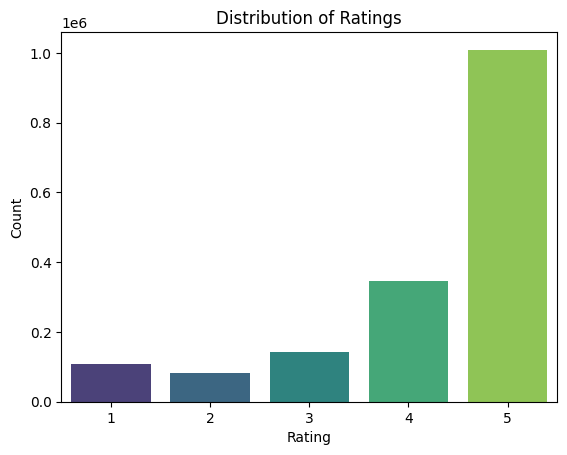

In [8]:
sns.countplot(data=df, x='overall', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


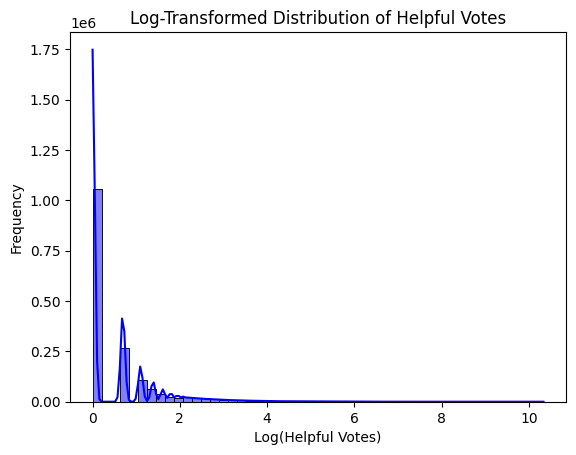

In [12]:
# Extract the 'helpful' votes
df['helpful_votes'] = df['helpful'].apply(lambda x: x[0] if isinstance(x, list) else 0)

# Add 1 to avoid log(0)
df['log_helpful_votes'] = np.log1p(df['helpful_votes'])

sns.histplot(df['log_helpful_votes'], bins=50, kde=True, color='blue')
plt.title('Log-Transformed Distribution of Helpful Votes')
plt.xlabel('Log(Helpful Votes)')
plt.ylabel('Frequency')
plt.show()

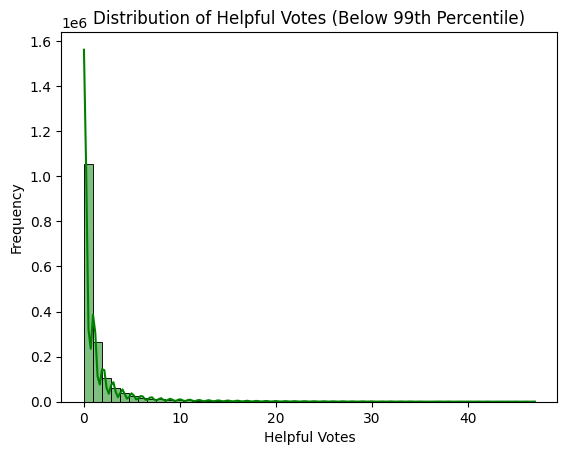

In [13]:
# Cap values at the 99th percentile
threshold = np.percentile(df['helpful_votes'], 99)
filtered_votes = df[df['helpful_votes'] <= threshold]

sns.histplot(filtered_votes['helpful_votes'], bins=50, kde=True, color='green')
plt.title('Distribution of Helpful Votes (Below 99th Percentile)')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()


Review Length

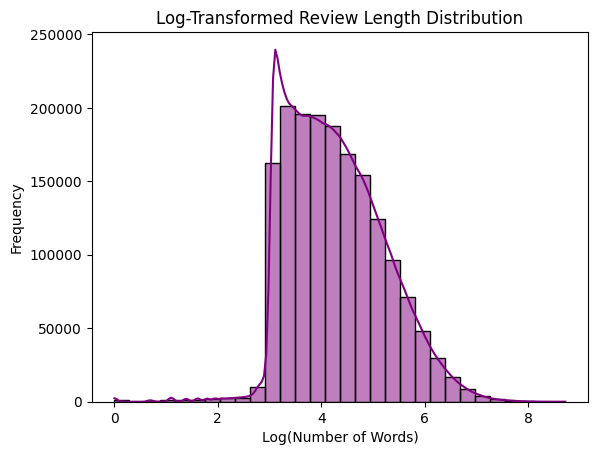

In [14]:
import numpy as np

# Apply log transformation to review lengths (add 1 to avoid log(0))
df['log_review_length'] = np.log1p(df['review_length'])

# Plot log-transformed review lengths
sns.histplot(df['log_review_length'], bins=30, kde=True, color='purple')
plt.title('Log-Transformed Review Length Distribution')
plt.xlabel('Log(Number of Words)')
plt.ylabel('Frequency')
plt.show()


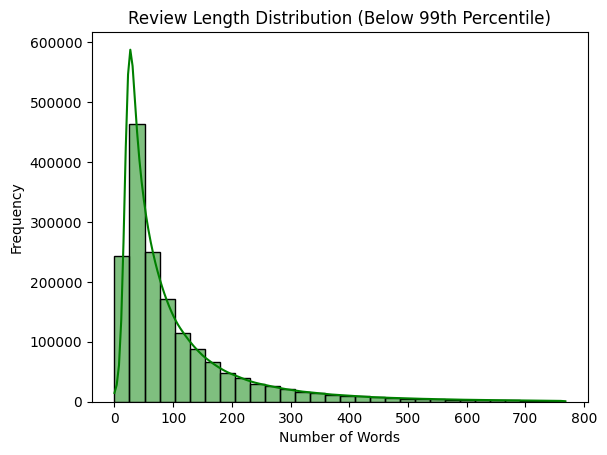

In [15]:
# Cap review lengths at the 99th percentile
threshold = np.percentile(df['review_length'], 99)
filtered_reviews = df[df['review_length'] <= threshold]

# Plot filtered review lengths
sns.histplot(filtered_reviews['review_length'], bins=30, kde=True, color='green')
plt.title('Review Length Distribution (Below 99th Percentile)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_44396\95111555.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='review_length_category', palette='coolwarm', order=['Short', 'Medium', 'Long'])


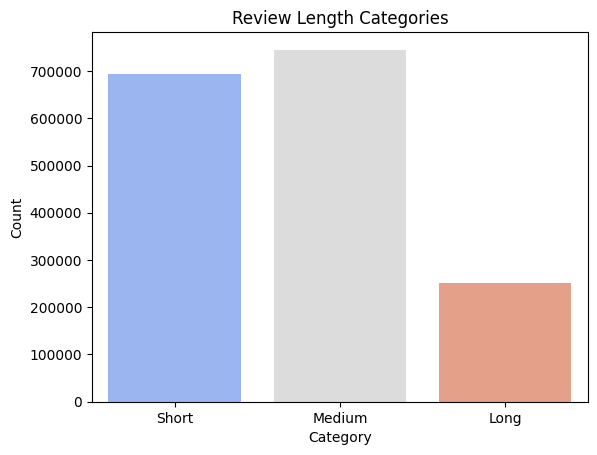

In [16]:
# Categorize reviews based on length
def categorize_review_length(length):
    if length <= 50:
        return 'Short'
    elif length <= 200:
        return 'Medium'
    else:
        return 'Long'

df['review_length_category'] = df['review_length'].apply(categorize_review_length)

# Plot review length categories
sns.countplot(data=df, x='review_length_category', palette='coolwarm', order=['Short', 'Medium', 'Long'])
plt.title('Review Length Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


Reviews over time

C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_44396\1766220522.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('reviewTime')['overall'].resample('M').count().plot(title='Number of Reviews Over Time', figsize=(12, 6))


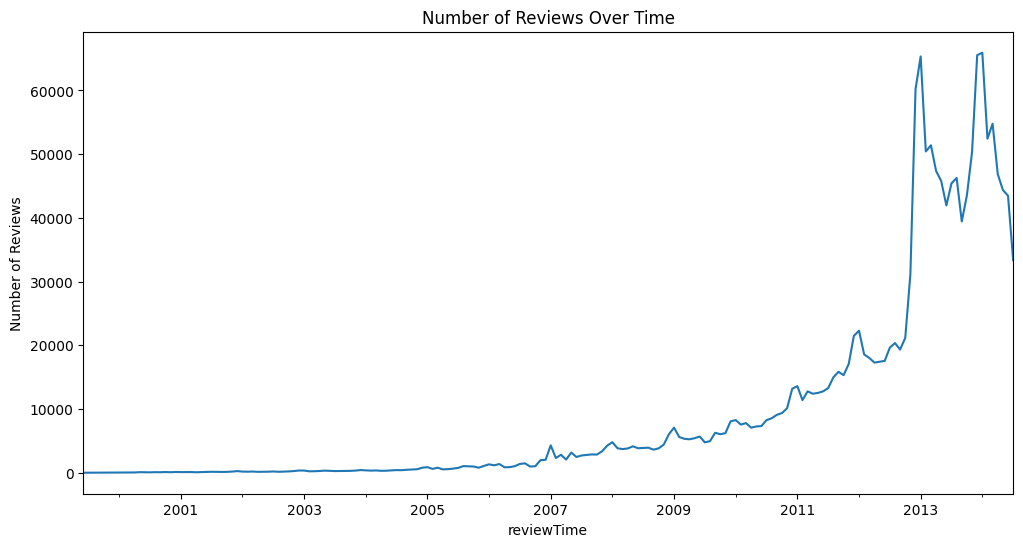

In [17]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Reviews over time
df.set_index('reviewTime')['overall'].resample('M').count().plot(title='Number of Reviews Over Time', figsize=(12, 6))
plt.ylabel('Number of Reviews')
plt.show()


New Column


In [112]:
# Calculate helpful ratio
df['helpful_ratio'] = df['helpful'].apply(
    lambda x: x[0] / x[1] if isinstance(x, list) and x[1] > 0 else 0
)

# Display a few rows to verify
print(df[['helpful', 'helpful_ratio']].head())


    helpful  helpful_ratio
0    [0, 0]       0.000000
1  [12, 15]       0.800000
2  [43, 45]       0.955556
3   [9, 10]       0.900000
4    [0, 0]       0.000000


In [113]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_ratio
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013",0.000000
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010",0.800000
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010",0.955556
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011",0.000000


In [114]:
df = df.drop(columns=['unixReviewTime', 'helpful', 'reviewerName' , 'asin', 'reviewerID'])

In [115]:
# Create a new column 'reviewLength' with the length of each review
df['reviewLength'] = df['reviewText'].apply(len)

In [116]:
df.head()

,reviewText,overall,summary,reviewTime,helpful_ratio,reviewLength
0,We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,"06 2, 2013",0.000000,805
1,"I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,"11 25, 2010",0.800000,2175
2,"Well, what can I say. I've had this unit in m...",3,1st impression,"09 9, 2010",0.955556,4607
3,"Not going to write a long review, even thought...",2,"Great grafics, POOR GPS","11 24, 2010",0.900000,2246
4,I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support","09 29, 2011",0.000000,1076


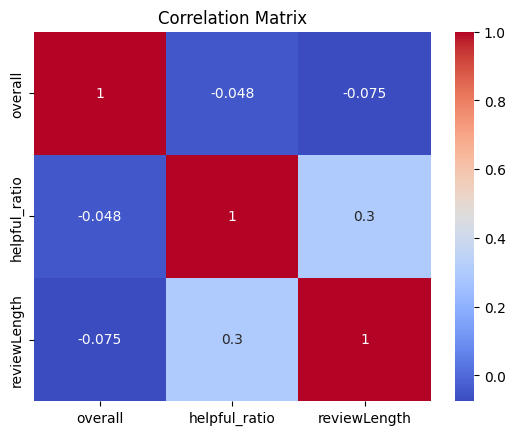

In [14]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Data Selection

In [117]:


# Define a function to compute a helpfulness score
def compute_helpfulness_score(helpful_ratio):
    if isinstance(helpful_ratio, (int, float)) and helpful_ratio >= 0:
        return helpful_ratio  # helpful_ratio is already a proportion, so we use it directly
    return 0  # Default score if helpful_ratio is invalid

# Define a function to compute a text quality score
def compute_text_quality(text):
    if isinstance(text, str):
        return len(text)  # Length of text as a proxy for quality
    return 0

# Define a function to select the top N reviews based on combined scores
def select_top_reviews(df, sentiment, n=20000):
    sentiment_df = df[df['Sentiment'] == sentiment]
    
    # Compute scores
    sentiment_df['helpfulness_score'] = sentiment_df['helpful_ratio'].apply(compute_helpfulness_score)
    sentiment_df['summary_length'] = sentiment_df['summary'].apply(compute_text_quality)
    sentiment_df['review_length'] = sentiment_df['reviewText'].apply(compute_text_quality)
    
    # Create a combined score (adjust weights as needed)
    sentiment_df['combined_score'] = (
        2 * sentiment_df['helpfulness_score'] + 
        0.1 * sentiment_df['summary_length'] + 
        0.1 * sentiment_df['review_length']
    )
    
    # Sort by the combined score and select the top N
    sentiment_df = sentiment_df.sort_values(by='combined_score', ascending=False).head(n)
    
    return sentiment_df

# Categorize reviews into Negative, Neutral, and Positive
df['Sentiment'] = df['overall'].apply(lambda x: 1 if x > 3 else (0 if x < 3 else 2))

# Select the top 20,000 reviews for each sentiment
dfnegative = select_top_reviews(df, sentiment=0, n=20000)  # Negative sentiment
dfneutral = select_top_reviews(df, sentiment=2, n=20000)   # Neutral sentiment
dfpositive = select_top_reviews(df, sentiment=1, n=20000)  # Positive sentiment

# Combine datasets
df = pd.concat([dfnegative,dfneutral,  dfpositive])

df.head()


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_63904\3183249416.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['helpfulness_score'] = sentiment_df['helpful_ratio'].apply(compute_helpfulness_score)
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_63904\3183249416.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['summary_length'] = sentiment_df['summary'].apply(compute_text_quality)
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_63904\3183249416.py:20: SettingWith

,reviewText,overall,summary,reviewTime,helpful_ratio,reviewLength,Sentiment,helpfulness_score,summary_length,review_length,combined_score
1040782,UPDATE: I changed my review from 3 stars to 1 ...,1,Beware: You can't buy more glasses... But it ...,"10 5, 2011",0.869565,29948,0,0.869565,65,29948,3003.03913
398618,I was asked to review the Sony XDR-F1HD by Jef...,2,iBiquity/IBOC HD (Hybrid digital) radio system...,"03 29, 2009",0.773585,24091,0,0.773585,117,24091,2422.34717
742715,*Update 5*Since receiving the refurbished GO 7...,1,Go with another brand. Garmin and Magellan Cus...,"08 28, 2010",1.000000,22028,0,1.000000,115,22028,2216.30000
1555104,Edit- 5/15These TVs have an amazing picture. N...,1,Buyer Beware! This model HAS ITS ISSUES! MAKE ...,"03 20, 2013",0.430435,20411,0,0.430435,86,20411,2050.56087
1686981,PROSLess expensive than Microsoft OfficeCan op...,2,Past Perfect--aging interface and lesser capab...,"06 23, 2014",1.000000,20114,0,1.000000,114,20114,2024.80000


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_63904\471077069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='overall', palette='viridis')


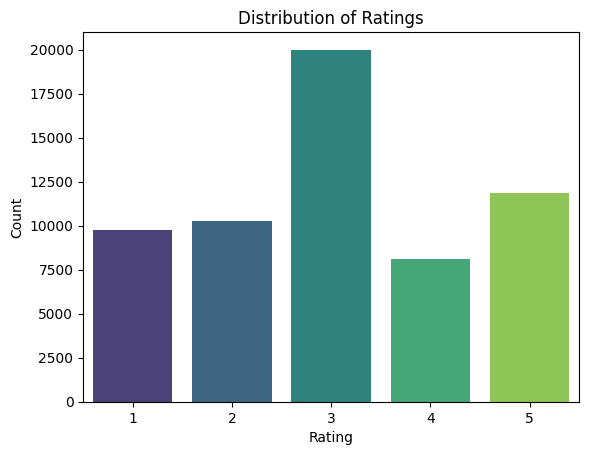

In [118]:
sns.countplot(data=df, x='overall', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [119]:
print("Negative Reviews Shape:", dfnegative.shape)
print("Neutral Reviews Shape:", dfneutral.shape)
print("Positive Reviews Shape:", dfpositive.shape)


Negative Reviews Shape: (20000, 11)
Neutral Reviews Shape: (20000, 11)
Positive Reviews Shape: (20000, 11)


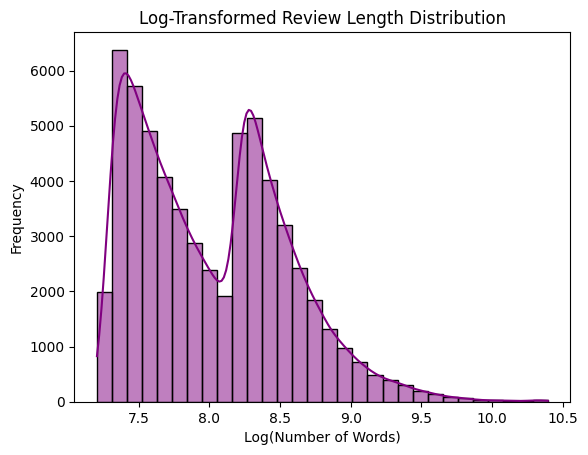

In [120]:
import numpy as np

# Apply log transformation to review lengths (add 1 to avoid log(0))
df['log_review_length'] = np.log1p(df['review_length'])

# Plot log-transformed review lengths
sns.histplot(df['log_review_length'], bins=30, kde=True, color='purple')
plt.title('Log-Transformed Review Length Distribution')
plt.xlabel('Log(Number of Words)')
plt.ylabel('Frequency')
plt.show()


In [121]:
df.head()

,reviewText,overall,summary,reviewTime,helpful_ratio,reviewLength,Sentiment,helpfulness_score,summary_length,review_length,combined_score,log_review_length
1040782,UPDATE: I changed my review from 3 stars to 1 ...,1,Beware: You can't buy more glasses... But it ...,"10 5, 2011",0.869565,29948,0,0.869565,65,29948,3003.03913,10.307251
398618,I was asked to review the Sony XDR-F1HD by Jef...,2,iBiquity/IBOC HD (Hybrid digital) radio system...,"03 29, 2009",0.773585,24091,0,0.773585,117,24091,2422.34717,10.089635
742715,*Update 5*Since receiving the refurbished GO 7...,1,Go with another brand. Garmin and Magellan Cus...,"08 28, 2010",1.000000,22028,0,1.000000,115,22028,2216.30000,10.000115
1555104,Edit- 5/15These TVs have an amazing picture. N...,1,Buyer Beware! This model HAS ITS ISSUES! MAKE ...,"03 20, 2013",0.430435,20411,0,0.430435,86,20411,2050.56087,9.923878
1686981,PROSLess expensive than Microsoft OfficeCan op...,2,Past Perfect--aging interface and lesser capab...,"06 23, 2014",1.000000,20114,0,1.000000,114,20114,2024.80000,9.909221


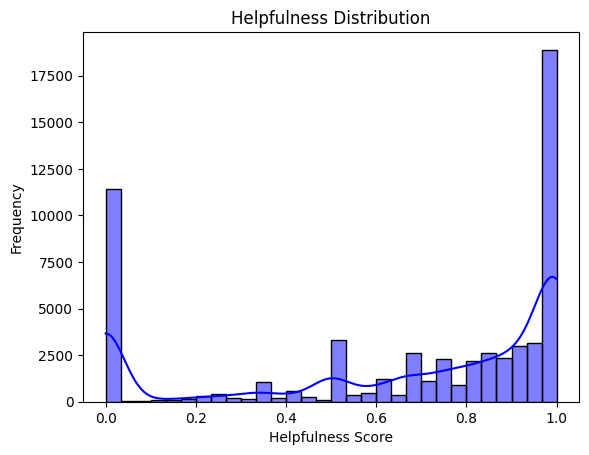

In [122]:
import numpy as np

# Apply log transformation to review lengths (add 1 to avoid log(0))
# df['log_review_length'] = np.log1p(df['review_length'])

# Plot log-transformed review lengths
sns.histplot(df['helpfulness_score'], bins=30, kde=True, color='blue')
plt.title('Helpfulness Distribution')
plt.xlabel('Helpfulness Score')
plt.ylabel('Frequency')
plt.show()


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_63904\1084041114.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


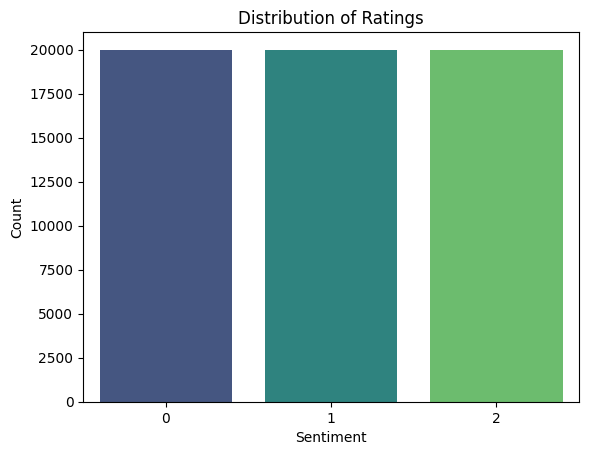

In [123]:
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Preprocessing

In [124]:
# Create a new DataFrame with selected columns
data = df[['reviewText', 'summary', 'reviewLength', 'Sentiment', 'summary_length']]

In [125]:
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer


def cleanText(raw_text, remove_stopwords=True, stemming=False, split_text=False, ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    # 1. Lowercase text
    text = text.lower()
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # 3. Remove emails
    text = re.sub(r'\S+@\S+\.\S+', '', text)
    # 4. Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # 5. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 

    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        stops.remove('not')
        stops.remove('no')
        words = [w for w in words if not w in stops]
    if stemming==True: # stemming
        stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [126]:
# Clean reviewText and summary
data['cleaned_reviewText'] = data['reviewText'].apply(lambda x: cleanText(x, remove_stopwords=True, stemming=True))
data['cleaned_summary'] = data['summary'].apply(lambda x: cleanText(x, remove_stopwords=True, stemming=True))



C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_63904\1616153066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_reviewText'] = data['reviewText'].apply(lambda x: cleanText(x, remove_stopwords=True, stemming=True))
C:\Users\Abdul Rehman\AppData\Roaming\Python\Python311\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_63904\1616153066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [127]:
# Function to get polarity and subjectivity
from textblob import TextBlob


def get_polarity_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity


data_Feature = data.copy()

# Apply the function to 'cleaned_reviewText' and 'cleaned_summary'
data_Feature[['review_polarity', 'review_subjectivity']] = data_Feature['cleaned_reviewText'].apply(lambda x: pd.Series(get_polarity_subjectivity(x)))
data_Feature[['summary_polarity', 'summary_subjectivity']] = data_Feature['cleaned_summary'].apply(lambda x: pd.Series(get_polarity_subjectivity(x)))

In [128]:
data_Feature.head()

,reviewText,summary,reviewLength,Sentiment,summary_length,cleaned_reviewText,cleaned_summary,review_polarity,review_subjectivity,summary_polarity,summary_subjectivity
1040782,UPDATE: I changed my review from 3 stars to 1 ...,Beware: You can't buy more glasses... But it ...,29948,0,65,updat chang review star year fair light usag m...,bewar cant buy glass work mac,0.120715,0.458643,0.00,0.000000
398618,I was asked to review the Sony XDR-F1HD by Jef...,iBiquity/IBOC HD (Hybrid digital) radio system...,24091,0,117,ask review soni xdrf hd jeff nelson public aff...,ibiquityiboc hd hybrid digit radio system eval...,0.109717,0.417945,0.00,0.000000
742715,*Update 5*Since receiving the refurbished GO 7...,Go with another brand. Garmin and Magellan Cus...,22028,0,115,updat sinc receiv refurbish go tm live here la...,go anoth brand garmin magellan custom servic u...,0.157839,0.385811,0.50,0.500000
1555104,Edit- 5/15These TVs have an amazing picture. N...,Buyer Beware! This model HAS ITS ISSUES! MAKE ...,20411,0,86,edit tvs amaz pictur no doubt look bad review ...,buyer bewar model issu make sure buy extend wa...,0.064855,0.442782,0.50,0.888889
1686981,PROSLess expensive than Microsoft OfficeCan op...,Past Perfect--aging interface and lesser capab...,20114,0,114,prosless expens microsoft officecan open popul...,past perfectag interfac lesser capabl make sui...,0.188084,0.447816,-0.25,0.583333


In [44]:
data.head()

,reviewText,summary,reviewLength,Sentiment,summary_length,cleaned_reviewText,cleaned_summary
1040782,UPDATE: I changed my review from 3 stars to 1 ...,Beware: You can't buy more glasses... But it ...,29948,0,65,updat chang review star year fair light usag m...,bewar cant buy glass work mac
398618,I was asked to review the Sony XDR-F1HD by Jef...,iBiquity/IBOC HD (Hybrid digital) radio system...,24091,0,117,ask review soni xdrf hd jeff nelson public aff...,ibiquityiboc hd hybrid digit radio system eval...
742715,*Update 5*Since receiving the refurbished GO 7...,Go with another brand. Garmin and Magellan Cus...,22028,0,115,updat sinc receiv refurbish go tm live here la...,go anoth brand garmin magellan custom servic u...
1555104,Edit- 5/15These TVs have an amazing picture. N...,Buyer Beware! This model HAS ITS ISSUES! MAKE ...,20411,0,86,edit tvs amaz pictur no doubt look bad review ...,buyer bewar model issu make sure buy extend wa...
1686981,PROSLess expensive than Microsoft OfficeCan op...,Past Perfect--aging interface and lesser capab...,20114,0,114,prosless expens microsoft officecan open popul...,past perfectag interfac lesser capabl make sui...


In [129]:
X = data_Feature[['cleaned_reviewText', 'cleaned_summary', 'review_polarity', 
        'review_subjectivity', 'reviewLength', 'summary_length']]


In [130]:


# Step 1: Create the TF-IDF vectorizer for cleaned_reviewText and cleaned_summary
vectorizer_reviewText = TfidfVectorizer(
    min_df=5,  # Minimum document frequency of 5
    ngram_range=(1, 2),  # Include unigrams and bigrams
    strip_accents='unicode',
    binary=True,  # Binary representation (1 or 0) instead of frequency
    max_features=5000  # Limit to top 5000 features
)

vectorizer_summary = TfidfVectorizer(
    min_df=5,  # Minimum document frequency of 5
    ngram_range=(1, 2),  # Include unigrams and bigrams
    strip_accents='unicode',
    binary=True,  # Binary representation (1 or 0) instead of frequency
    max_features=5000  # Limit to top 5000 features
)

# Step 2: Fit and transform the cleaned_reviewText and cleaned_summary
X_reviewText = vectorizer_reviewText.fit_transform(X['cleaned_reviewText'])
X_summary = vectorizer_summary.fit_transform(X['cleaned_summary'])




In [131]:
from scipy.sparse import hstack

# Step 3: Combine the TF-IDF matrices from cleaned_reviewText and cleaned_summary
X_combined_text = hstack([X_reviewText, X_summary])

# Step 4: Extract numerical features
numerical_features = X[['review_polarity', 'review_subjectivity', 'reviewLength', 'summary_length']].values

# Convert the numerical features into a sparse matrix (to keep it compatible with the TF-IDF matrix)
from scipy.sparse import csr_matrix
numerical_sparse = csr_matrix(numerical_features)

# Step 5: Combine the TF-IDF matrix and numerical features
X_final = hstack([X_combined_text, numerical_sparse])

# Check the shape of the final feature matrix
print(f"Shape of the final combined feature matrix: {X_final.shape}")

Shape of the final combined feature matrix: (60000, 10004)


In [132]:
from sklearn.metrics import accuracy_score
# Step 1: Prepare the data
# Assuming `X_final` is the combined feature matrix
# You need the target variable 'Sentiment' (which should be a categorical variable)
y = data_Feature['Sentiment']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Step 3: Optional - Scale the data (especially if features vary in magnitude)
scaler = StandardScaler(with_mean=False)  # Set with_mean=False since it's a sparse matrix
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=500) # Set max_iter to ensure convergence
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report (precision, recall, F1-score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Get the model's coefficients for feature importance (if needed)
print("Model Coefficients:")
print(model.coef_)


Accuracy: 0.6724
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      3963
           1       0.79      0.79      0.79      4023
           2       0.57      0.58      0.57      4014

    accuracy                           0.67     12000
   macro avg       0.67      0.67      0.67     12000
weighted avg       0.67      0.67      0.67     12000

Model Coefficients:
[[ 0.03880029 -0.05022927  0.08777124 ...  2.14355222  0.55618938
   0.05781435]
 [-0.04371543  0.07888562 -0.12482252 ... -4.26813173 -0.72060632
   0.02870794]
 [ 0.00491513 -0.02865635  0.03705128 ...  2.12457951  0.16441695
  -0.08652229]]


In [133]:
# Save the vectorizers and other necessary components
joblib.dump(vectorizer_reviewText, 'vectorizer_reviewText.joblib')
joblib.dump(vectorizer_summary, 'vectorizer_summary.joblib')  # Save the summary vectorizer
joblib.dump(scaler, 'scaler_sunday2.joblib')  # Save the scaler if it's used


['scaler_sunday2.joblib']

In [135]:
import joblib

# Save the model
joblib.dump(model, 'sunday2.joblib')

# Optionally, save the scaler as well (since you used scaling)
joblib.dump(scaler, 'scaler_sunday1.joblib')


['scaler_sunday1.joblib']

In [142]:
import joblib
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Load the saved model and vectorizers
model = joblib.load('sunday2.joblib')  # Logistic regression model
vectorizer_reviewText = joblib.load('vectorizer_reviewText.joblib')  # Tfidf vectorizer for reviewText
vectorizer_summary = joblib.load('vectorizer_summary.joblib')  # Tfidf vectorizer for summary
scaler = joblib.load('scaler_sunday1.joblib')  # StandardScaler (if applied)

# Step 2: Prepare the new data for prediction
# Example: you can test with some new data (cleaned review text, summary, and numerical features)
new_data = {
    'cleaned_reviewText': ["ugly fake"],
    'cleaned_summary': ["Highly fake"],
    'review_polarity': [0],  # Example polarity score
    'review_subjectivity': [0],  # Example subjectivity score
    'reviewLength': [50],  # Example review length
    'summary_length': [5]  # Example summary length
}

# Convert new data into DataFrame (mimicking the format of your training data)
import pandas as pd
new_df = pd.DataFrame(new_data)

# Step 3: Transform the text data using the saved TF-IDF vectorizers
X_reviewText_new = vectorizer_reviewText.transform(new_df['cleaned_reviewText'])
X_summary_new = vectorizer_summary.transform(new_df['cleaned_summary'])

# Combine the transformed text features
X_combined_text_new = hstack([X_reviewText_new, X_summary_new])

# Step 4: Extract and transform the numerical features for the new data
numerical_features_new = new_df[['review_polarity', 'review_subjectivity', 'reviewLength', 'summary_length']].values
numerical_sparse_new = csr_matrix(numerical_features_new)

# Step 5: Combine the transformed text features and numerical features
X_final_new = hstack([X_combined_text_new, numerical_sparse_new])

# Step 6: Scale the data if you applied scaling during training
X_final_new_scaled = scaler.transform(X_final_new)

# Step 7: Make predictions using the trained model
y_pred_new = model.predict(X_final_new_scaled)

# Step 8: Output the result (the predicted sentiment)
print(f"Predicted Sentiment: {y_pred_new[0]}")

# Optional: If you have a mapping of sentiment values (e.g., 0=Negative, 1=Positive), you can display a label
sentiment_labels = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
print(f"Sentiment Label: {sentiment_labels.get(y_pred_new[0], 'Unknown')}")


Predicted Sentiment: 1
Sentiment Label: Positive


Single Feature

In [104]:
X2 = data_Feature[['cleaned_reviewText']]


In [99]:


# Step 1: Create the TF-IDF vectorizer for cleaned_reviewText and cleaned_summary
vectorizer_reviewText = TfidfVectorizer(
    min_df=5,  # Minimum document frequency of 5
    ngram_range=(1, 2),  # Include unigrams and bigrams
    strip_accents='unicode',
    binary=True,  # Binary representation (1 or 0) instead of frequency
    max_features=5000  # Limit to top 5000 features
)

# vectorizer_summary = TfidfVectorizer(
#     min_df=5,  # Minimum document frequency of 5
#     ngram_range=(1, 2),  # Include unigrams and bigrams
#     strip_accents='unicode',
#     binary=True,  # Binary representation (1 or 0) instead of frequency
#     max_features=5000  # Limit to top 5000 features
# )

# Step 2: Fit and transform the cleaned_reviewText and cleaned_summary
X_reviewText = vectorizer_reviewText.fit_transform(X2['cleaned_reviewText'])
# X_summary = vectorizer_summary.fit_transform(X2['cleaned_summary'])




In [105]:
from scipy.sparse import hstack

# Step 3: Combine the TF-IDF matrices from cleaned_reviewText and cleaned_summary
X_combined_text = hstack([X_reviewText])

# Step 4: Extract numerical features
# numerical_features = X2[['review_polarity']].values

# Convert the numerical features into a sparse matrix (to keep it compatible with the TF-IDF matrix)
# from scipy.sparse import csr_matrix
# numerical_sparse = csr_matrix(numerical_features)

# Step 5: Combine the TF-IDF matrix and numerical features
X_final = hstack([X_combined_text])

# Check the shape of the final feature matrix
print(f"Shape of the final combined feature matrix: {X_final.shape}")

Shape of the final combined feature matrix: (40000, 5000)


In [106]:
from sklearn.metrics import accuracy_score
# Step 1: Prepare the data
# Assuming `X_final` is the combined feature matrix
# You need the target variable 'Sentiment' (which should be a categorical variable)
y = data_Feature['Sentiment']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Step 3: Optional - Scale the data (especially if features vary in magnitude)
scaler = StandardScaler(with_mean=False)  # Set with_mean=False since it's a sparse matrix
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Set max_iter to ensure convergence
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report (precision, recall, F1-score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Get the model's coefficients for feature importance (if needed)
print("Model Coefficients:")
print(model.coef_)


Accuracy: 0.8805
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4014
           1       0.88      0.88      0.88      3986

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000

Model Coefficients:
[[-0.1361665   0.35920503 -0.17063273 ...  0.28362243  0.12155047
   0.35868551]]


In [83]:
X_train_scaled.shape

(32000, 10002)

In [107]:
# Save the vectorizers and other necessary components
joblib.dump(vectorizer_reviewText, 'vectorizer_reviewText.joblib')
joblib.dump(vectorizer_summary, 'vectorizer_summary.joblib')  # Save the summary vectorizer
joblib.dump(scaler, 'scaler_sunday1.joblib')  # Save the scaler if it's used
# Save the model
joblib.dump(model, 'sunday12345.joblib')


['sunday12345.joblib']

In [109]:
import joblib
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Load the saved model and vectorizers
model = joblib.load('sunday12345.joblib')  # Logistic regression model
vectorizer_reviewText = joblib.load('vectorizer_reviewText.joblib')  # Tfidf vectorizer for reviewText
vectorizer_summary = joblib.load('vectorizer_summary.joblib')  # Tfidf vectorizer for summary
scaler = joblib.load('scaler_sunday1.joblib')  # StandardScaler (if applied)

# Step 2: Prepare the new data for prediction
# Example: you can test with some new data (cleaned review text, summary, and numerical features)
new_data = {
    'cleaned_reviewText': ["Excellent good beautiful nice highly appricated very good product"],
    # 'cleaned_summary': ["Good product really loved it"],
    # 'review_polarity': [1],  # Example polarity score
    # 'review_subjectivity': [1],  # Example subjectivity score

}

# Convert new data into DataFrame (mimicking the format of your training data)
import pandas as pd
new_df = pd.DataFrame(new_data)

# Step 3: Transform the text data using the saved TF-IDF vectorizers
X_reviewText_new = vectorizer_reviewText.transform(new_df['cleaned_reviewText'])
# X_summary_new = vectorizer_summary.transform(new_df['cleaned_summary'])

# Combine the transformed text features
X_combined_text_new = hstack([X_reviewText_new])

# Step 4: Extract and transform the numerical features for the new data
# numerical_features_new = new_df[['review_polarity']].values
# numerical_sparse_new = csr_matrix(numerical_features_new)

# Step 5: Combine the transformed text features and numerical features
X_final_new = hstack([X_combined_text_new])

# Step 6: Scale the data if you applied scaling during training
X_final_new_scaled = scaler.transform(X_final_new)

# Step 7: Make predictions using the trained model
y_pred_new = model.predict(X_final_new_scaled)

# Step 8: Output the result (the predicted sentiment)
print(f"Predicted Sentiment: {y_pred_new[0]}")

# Optional: If you have a mapping of sentiment values (e.g., 0=Negative, 1=Positive), you can display a label
sentiment_labels = {0: 'Negative', 1: 'Positive'}
print(f"Sentiment Label: {sentiment_labels.get(y_pred_new[0], 'Unknown')}")


Predicted Sentiment: 0
Sentiment Label: Negative
